In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [293]:
suicide_data = pd.read_csv('master.csv')

In [294]:
countries = np.unique(suicide_data['country'])
countries_df = pd.DataFrame({'Country Name': countries})
# countries_df

In [295]:
years = suicide_data.year.unique()
years = np.sort(years)
years = list(years)

In [296]:
columns = list(suicide_data)
columns[6]

'suicides/100k pop'

In [297]:
tuple_ = []

for country in countries:
    country_data = suicide_data[suicide_data['country'] == country]
    country_name = list(country_data.country.unique())[0]
    for year in years:
        suicide = country_data[country_data['year'] == year]['suicides/100k pop'].sum()
        tuple_.append((year, country, suicide))




In [298]:
suicide_data_new = pd.DataFrame(tuple_, columns=['year', 'country', 'suicide_rate'])
countries_df = pd.DataFrame(data={'country':countries})


for year in years:
    data_year = suicide_data_new[suicide_data_new['year'] == year].reset_index(drop=True)
    s_rate_year = pd.DataFrame(data={str(year): data_year['suicide_rate']})
    countries_df = countries_df.join(s_rate_year)

countries_df
# countries_df.to_csv('suicide_rate.csv', index=False)

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,0.00,0.00,31.85,32.46,33.40,0.00,0.00,18.00,32.56,...,65.85,71.05,0.00,41.66,0.00,0.00,0.00,0.00,0.00,0.00
1,Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,17.24,0.00,0.00,15.00,...,7.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.62,0.00
2,Argentina,134.47,152.90,144.98,146.24,138.93,134.90,119.24,126.86,134.77,...,118.35,118.11,107.32,111.24,105.87,119.82,103.42,111.35,112.13,0.00
3,Armenia,0.00,0.00,0.00,0.00,0.00,41.12,45.87,40.86,51.05,...,39.02,35.15,33.70,40.41,32.98,36.57,37.48,37.01,45.28,40.56
4,Aruba,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,92.19,41.44,42.23,58.65,93.42,0.00,0.00,0.00,0.00,0.00
5,Australia,163.41,175.79,188.82,179.32,168.11,172.35,180.15,170.64,154.95,...,130.25,130.49,130.12,132.64,133.22,139.57,138.78,149.07,154.18,0.00
6,Austria,384.81,401.80,405.88,357.64,359.32,353.78,355.47,341.74,347.96,...,217.31,216.45,213.22,207.55,211.49,206.63,212.12,209.82,194.62,183.23
7,Azerbaijan,0.00,0.00,0.00,0.00,0.00,24.61,32.23,34.78,31.52,...,11.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Bahamas,4.76,0.00,13.59,0.00,0.00,0.00,0.00,0.00,37.51,...,13.42,12.49,15.98,58.32,12.99,11.84,13.91,0.00,0.00,0.00
9,Bahrain,20.12,0.00,25.68,24.80,0.00,0.00,0.00,0.00,0.00,...,32.09,27.89,24.59,11.89,14.96,8.68,2.49,6.52,0.00,0.00


In [356]:
# plotting 1985 visuals
metricscale=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,164)'],
             [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'],
             [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'],
             [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale,
        showscale=True,
        locations = countries_df['country'].values,
        z = countries_df['1985'].values,
        locationmode = 'country names', 
        text = countries_df['country'].values,
        marker = dict(
            line = dict(color='rgb(0, 0, 0)', width=1)),
            colorbar = dict(autotick=True, tickprefix='',
            title = '# Suicide\nRate')
#        marker = go.ch 
            )
       ]


layout = dict(
    title = 'World Map of Suicide Rate in the Year 1985',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
#         type = 'equirectangular'
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10)
        ),
        lonaxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.plot(fig, validate=False, filename='worldmap1985')


# plotting 2016 visuals
metricscale=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,164)'],
             [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'],
             [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'],
             [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale,
        showscale=True,
        locations = countries_df['country'].values,
        z = countries_df['2016'].values,
        locationmode = 'country names', 
        text = countries_df['country'].values,
        marker = dict(
            line = dict(color='rgb(0, 0, 0)', width=1)),
            colorbar = dict(autotick=True, tickprefix='',
            title = '# Suicide\nRate')
#        marker = go.ch 
            )
       ]


layout = dict(
    title = 'World Map of Suicide Rate in the Year 2016',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
#         type = 'equirectangular'
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10)
        ),
        lonaxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.plot(fig, validate=False, filename='worldmap2016')

'file://C:\\Users\\Chijioke\\Documents\\DataScience\\Kaggle\\suicide_rates\\worldmap2016.html'

Object `isin` not found.


In [305]:
value = ['Albania', 'Nigeria', 'France', 'Ghana', 'Spain']
countries_df[countries_df['country'].isin(value)]

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,0.00,0.00,31.85,32.46,33.40,0.00,0.00,18.00,32.56,...,65.85,71.05,0.00,41.66,0.00,0.00,0.00,0.00,0.00,0.0
33,France,348.90,351.77,331.03,312.72,312.53,302.73,298.10,301.47,312.69,...,213.69,216.21,216.24,211.17,211.18,198.98,192.33,179.56,0.00,0.0
86,Spain,114.93,119.83,122.14,127.28,126.49,129.24,121.84,119.01,120.85,...,98.95,98.52,98.02,87.44,88.59,96.88,101.32,104.35,97.38,0.0


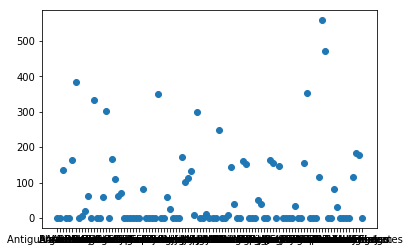

In [306]:
plt.scatter(countries_df['country'], countries_df['1985'])
plt.show()

AttributeError: 'list' object has no attribute 'dtype'

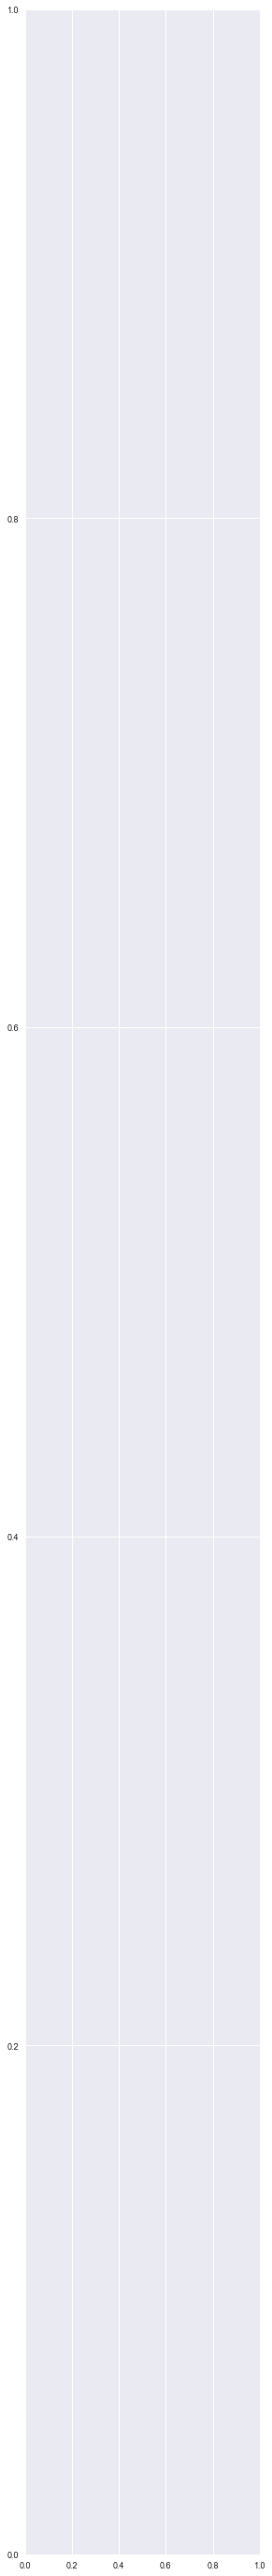

In [355]:

# # s_rate_1985_bar, countries_bar = countries_df['1985'], countries_df['country']
# s_rate_1985_bar, countries_bar = (list(x) for x in zip(*sorted(zip(countries_df['1985'], countries_df['country'].values), 
                                                            reverse = True)))

# sns.set(font_scale=0.9)
# f, ax = plt.subplots(figsize=(4.5, 50))
# colors_cw = sns.color_palette('coolwarm', len(countries_df['country']))
# sns.barplot(s_rate_1985_bar, countries_bar, palette=colors_cw[::-1] )
# Text = ax.set(xlabel='Suicide Rate', title='Suicide Rate in Countries in 1985')
# type(list(countries_df['1985'].values))

In [312]:
# sorted(reverse=True)
# list(countries_df['1985'])